In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [50]:
df.isnull().mean() * 100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


Text(0.5, 1.0, 'Missing Values')

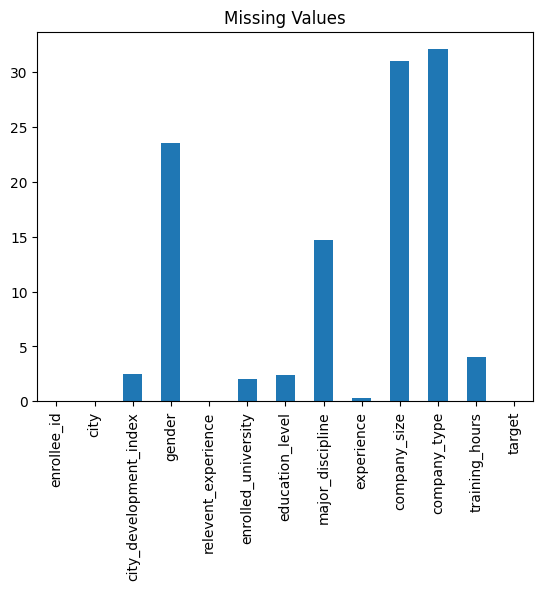

In [54]:
fig = (df.isnull().mean()*100).plot(kind = "bar")
fig.set_title("Missing Values")

In [55]:
df.shape

(19158, 13)

In [57]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [58]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
6451,0.920,no_enrollment,Masters,8.0,90.0
17677,0.743,no_enrollment,Masters,NaN,144.0
4918,0.910,no_enrollment,Graduate,20.0,280.0
15058,0.527,Full time course,Graduate,3.0,96.0
9652,0.926,no_enrollment,Graduate,11.0,30.0


In [59]:
## Finding Loss
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [63]:
new_df = df[cols].dropna()
df.shape[0] , new_df.shape[0]

(19158, 17182)

In [64]:
count_df , count_new_df = df.shape[0] , new_df.shape[0]
count_df - count_new_df

1976

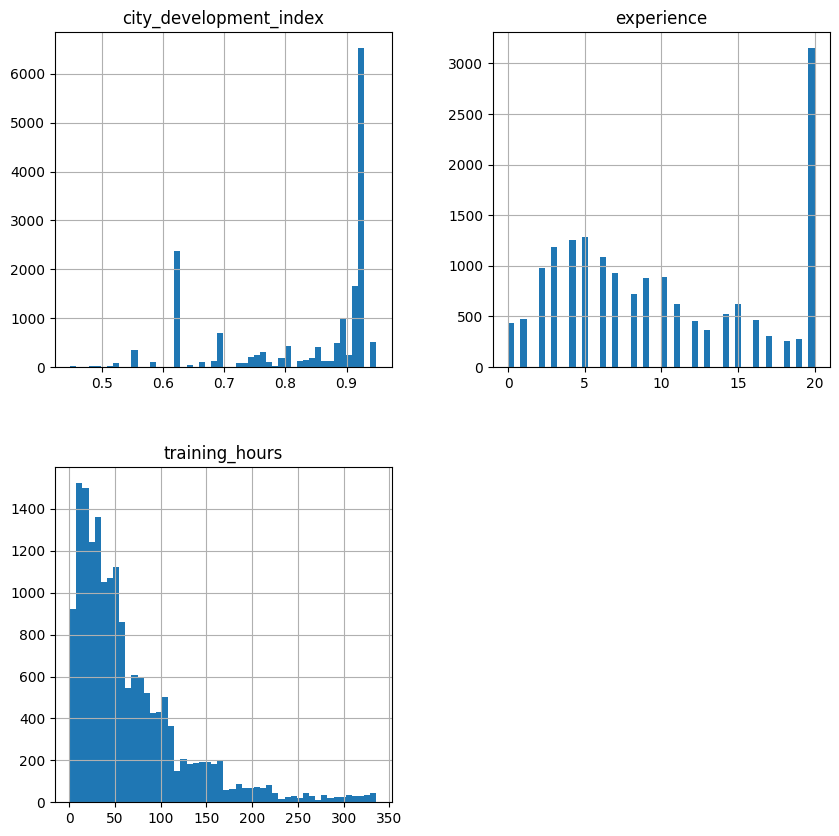

In [68]:
new_df.hist(bins = 50 , figsize = (10,10))
plt.show()

<Axes: >

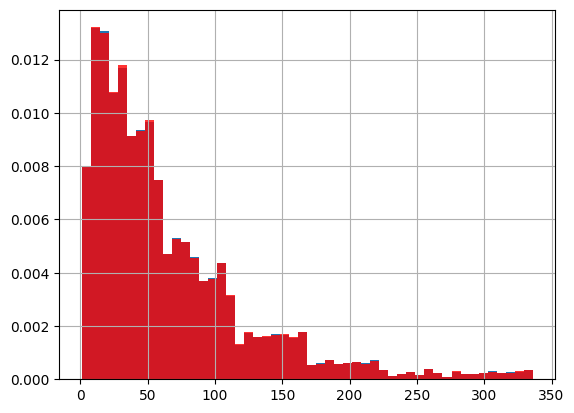

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)


## Original Data
df["training_hours"].hist(bins = 50 , ax = ax , density = True)

## New Data
new_df["training_hours"].hist(bins = 50 , ax = ax , density = True , alpha = 0.8 , color = "red")



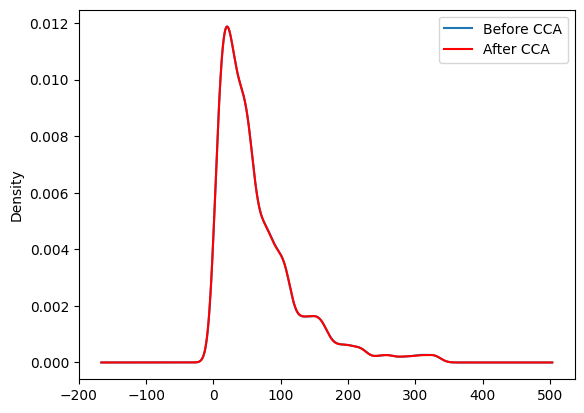

In [78]:

## Original Data
df["training_hours"].plot(kind = "kde" , label = "Before CCA")

## New Data
new_df["training_hours"].plot(kind = "kde" , color = "red" , label = "After CCA")

plt.legend()
plt.show()

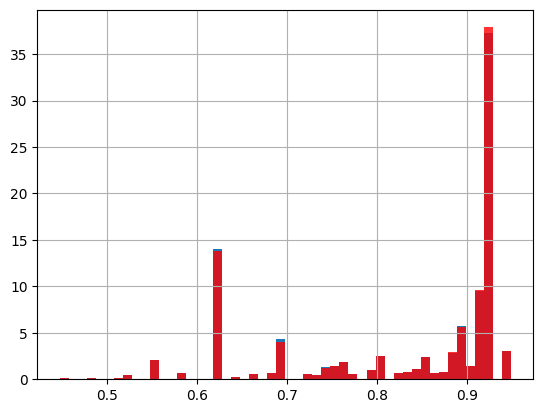

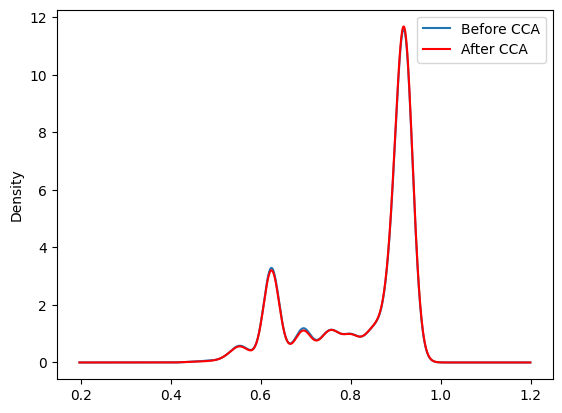

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)


## Original Data
df["city_development_index"].hist(bins = 50 , ax = ax , density = True)

## New Data
new_df["city_development_index"].hist(bins = 50 , ax = ax , density = True , alpha = 0.8 , color = "red")

plt.show()
## Original Data
df["city_development_index"].plot(kind = "kde" , label = "Before CCA")

## New Data
new_df["city_development_index"].plot(kind = "kde" , color = "red" , label = "After CCA")

plt.legend()
plt.show()

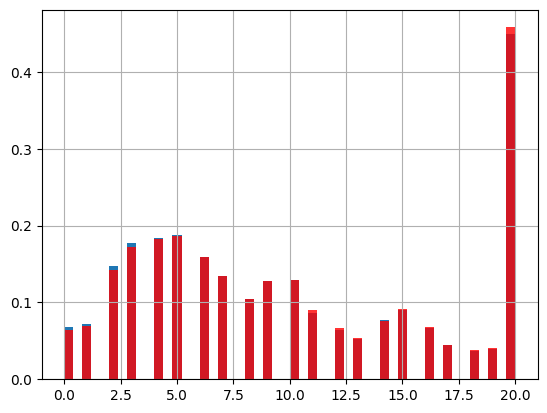

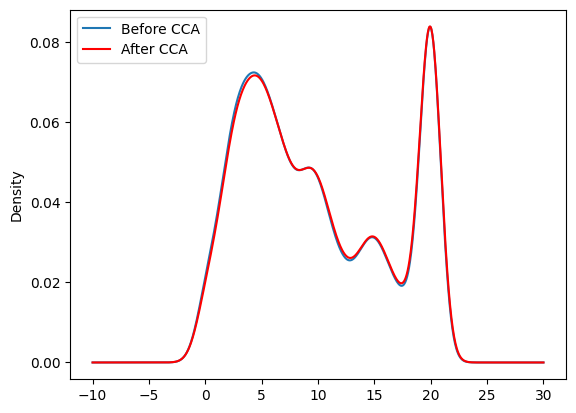

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)


## Original Data
df["experience"].hist(bins = 50 , ax = ax , density = True)

## New Data
new_df["experience"].hist(bins = 50 , ax = ax , density = True , alpha = 0.8 , color = "red")

plt.show()
## Original Data
df["experience"].plot(kind = "kde" , label = "Before CCA")

## New Data
new_df["experience"].plot(kind = "kde" , color = "red" , label = "After CCA")

plt.legend()
plt.show()

In [84]:
df["enrolled_university"].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [85]:
df["education_level"].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [87]:
temp = pd.concat([
    ### Before CCA
    df["enrolled_university"].value_counts() / len(df),

    ### After CCA
    new_df["enrolled_university"].value_counts() / len(new_df)
] , axis = 1)
temp.columns = ["Original","CCA"]

temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [88]:
temp = pd.concat([
    ### Before CCA
    df["education_level"].value_counts() / len(df),

    ### After CCA
    new_df["education_level"].value_counts() / len(new_df)
] , axis = 1)

temp.columns = ["Original","CCA"]

temp

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
